# <center> Decision Tree & Random Forest </center>

### About Dataset:

The iris(the flower)dataset attached contains five variables namely,<br>

1. Sepal Length(Cm)
2. Sepal Width(Cm)
3. Petal Length(Cm)
4. Petal Width(Cm)
5. Species

<br>
<font color ="blue">**AIM:<br>
To Perform Classification of iris species using Decision Tree & Random Forest Classifier **</font>

## Loading Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


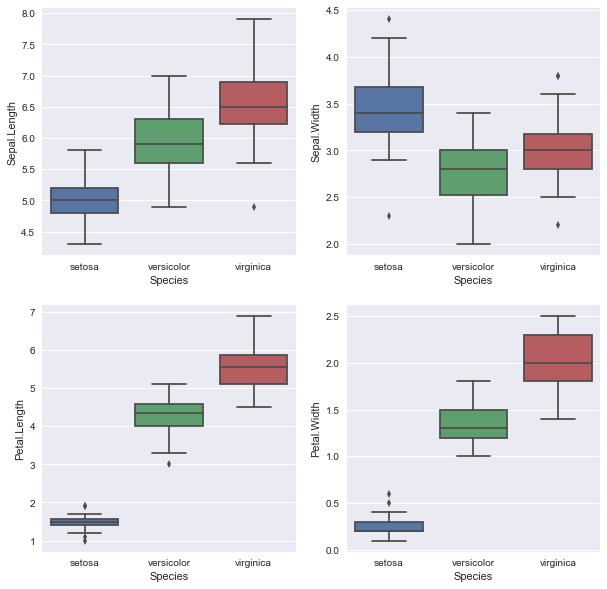

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x = "Species", y="Sepal.Length",data = df)

plt.subplot(222)
sns.boxplot(x = "Species", y="Sepal.Width",data = df)

plt.subplot(223)
sns.boxplot(x = "Species", y="Petal.Length",data = df)

plt.subplot(224)
sns.boxplot(x = "Species", y="Petal.Width",data = df)
plt.show()


Summary:
1. Boxplots shows that Setosa species have different characteristics than versicolor and virginica species be , lon story short setosa are shortest in length and wider than other two species.
2. Versicolor, viginica are having some similar characteristics but still their is difference between them , we can say this because in none on the features the median line of both the species are overlapping they are far apart.

## Defining the target and predictors variable

In [25]:
y = df["Species"]
x= df.drop("Species",axis=1)

In [7]:
##decision tree with more than 2 category in categorical variable

## Training and Splitting

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state=1)

## Building Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
print(dtree.score(x,y))
print(sum(dtree.decision_path(x)))
print(dtree.feature_importances_)

0.973333333333
  (0, 0)	150
  (0, 1)	50
  (0, 2)	100
  (0, 3)	52
  (0, 4)	48
  (0, 5)	4
  (0, 6)	48
  (0, 7)	4
  (0, 8)	44
[ 0.        0.        0.702149  0.297851]


## Prediction:

In [31]:
predict = dtree.predict(xtest)

## Evaluation of Model

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print(confusion_matrix(ytest,predict))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [35]:
print(classification_report(ytest,predict))
print(accuracy_score(ytest,predict))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.94      0.94      0.94        18
  virginica       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45

0.955555555556


***Summary: Decision Tree Model***<br>
1. we had clearly classify setosa
1. we got 95.5% accuracy

## Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rdf = RandomForestClassifier(n_estimators = 10)

In [38]:
rdf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [39]:
pr = rdf.predict(xtest)

In [40]:
confusion_matrix(ytest,pr)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [42]:
print(classification_report(ytest,pr))
print(accuracy_score(ytest,pr))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.94      0.94      0.94        18
  virginica       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45

0.955555555556


**the results are same due to the fact that the dataset is small and we cannot see that much of a difference**

** though we wont get much difference but lets try using Grid Search with both DT and RF model**

In [43]:
## through grid search cv bot dt and rf
## just have to set diffrent parametrs

### Setting up the hyper parameters

In [45]:
dtparam = {"criterion":["gini","entropy"],"max_depth":[2,7],"max_leaf_nodes":[20,30]}

In [46]:
gridinstance = GridSearchCV(DecisionTreeClassifier(),dtparam)

In [47]:
p = gridinstance.fit(xtrain,ytrain)

In [48]:
dtree.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [49]:
prr = gridinstance.predict(xtest)

In [50]:
confusion_matrix(ytest,prr)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [51]:
print(classification_report(ytest,prr))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.94      0.94      0.94        18
  virginica       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45



In [52]:
##grid search for random tree

In [53]:
rfparams = {'criterion':["gini","entropy"], 'max_depth':[3,4,5,6,7],'max_leaf_nodes':[10,20,30,40,50,60],'n_estimators':[10,30,40,40,100]}

In [54]:
rdf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [55]:
gridi = GridSearchCV(RandomForestClassifier(),rfparams)

In [56]:
gridi.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7], 'max_leaf_nodes': [10, 20, 30, 40, 50, 60], 'n_estimators': [10, 30, 40, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
gridi.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'n_estimators': 10}

In [58]:
gridi_predict = gridi.predict(xtest)

In [59]:
print(accuracy_score(ytest,gridi_predict))

0.955555555556


** Summary : **
1. same result as the above two models
2. we got to learn which parameter are the best parameters of all that is leading a role in better performance of the model.
3. our model performed well in prediction of the species of iris flower.